# Solving the OLG model under the PAYG system

Importing packages and sets magic

In [156]:
from types import SimpleNamespace

from scipy import optimize
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

In this section the OLG model under a PAYG system is found anatically. The optimal levels of the intertemporal consumption, savings and capital accumulation are displayed, as well as the steady-state level of capital. First, we import our model from our .py file

In [157]:
model = modelproject.OLGModel()
par = model.par

In [158]:
print('Utility Function:')
display(sp.Eq(sp.symbols('U'),model.utility()))
print('Euler:')
display(model.euler())



Utility Function:


Eq(U, log(c_1t) + log(c_{2t+1})/(rho + 1))

Euler:


Eq(c_1t, c_{2t+1}*(rho + 1)/(r_{t+1} + 1))

Where $c_{1t}$ and $c_{2t+1}$ in the Euler equation are the derivative of the utility function wrt. the respective variables. We now move on to find the optimal savings in this economy,

In [159]:
print('Optimal savings:')
display(sp.Eq(par.s_t,model.savings()))

Optimal savings:


Eq(s_t, (-n*rho*tau*w_{t+1} - n*tau*w_{t+1} + r_{t+1}*tau*w_t - r_{t+1}*w_t - rho*tau*w_{t+1} + tau*w_t - tau*w_{t+1} - w_t)/(rho*(r_{t+1} + 1)))

With the optimal savings in place, we can now move on to find the capital accumulation, and the steady state of this, 

In [160]:
print('Capital Accumulation:')
display(model.capitalaccum())
print('Steady State:')
display(model.steadystatecap())

Capital Accumulation:


Eq(k_{t+1}, A*k_t**alpha*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))

Steady State:


Eq(k^*, (A*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))**(1/(1 - alpha)))

## Numerical solution

We can now try to plot our model for different values of the parameters. Let's start by examining how the steady state looks.

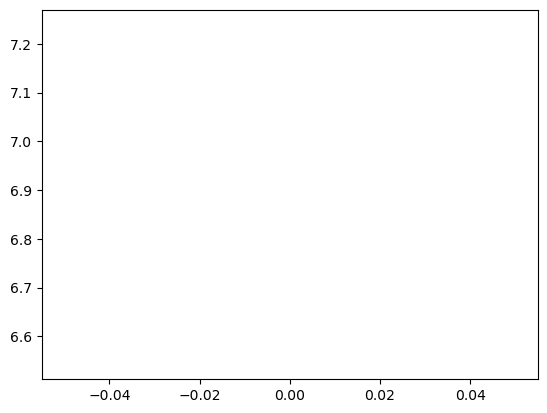

In [195]:
alpha = 1/3
rho = 0.4
n = 0.01
tau = 0.35
A = 20

T = 10 # Number of periods to simulate

# Initializing arrays to store the values of the endogenous variables
k_t = np.zeros(T)

# Setting the initial values of the endogenous variables
k_t[0]=0.01

k_t = np.linspace(1,20,100)

k_t1 = []

# Simulating the model
for k_t in k_t:
    k_t1 = (1/(1+(1+rho)/(2+rho)*((1-alpha)/alpha)*tau))*((1-alpha)*(1-tau))/((1+n)*(2+rho))*A * k_t**(alpha)

plt.plot(k_t1)
plt.show()


# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 